#Exploring Personal Perception Influence on Match

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [9]:
url = 'https://raw.githubusercontent.com/samoseley/ecs171projectspeeddating/main/Speed%20Dating%20Data.csv'
df = pd.read_csv(url, encoding='latin1')

##Preprocessing

###Copying Important Features
Looking at people's expectations for the night and ratings of their own attractiveness, sincerity, intelligence, fun, ambition and shared interests. Including some demographic information.

In [10]:
df = df[['gender', 'match', 'age', 'race', 'imprace', 'imprelig', 'exphappy',
       'expnum', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met', 'match_es']].copy()
display(df)

,gender,match,age,race,imprace,imprelig,exphappy,expnum,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es
0,0,0,21.0,4.0,2.0,4.0,3.0,2.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0
1,0,0,21.0,4.0,2.0,4.0,3.0,2.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0
2,0,1,21.0,4.0,2.0,4.0,3.0,2.0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0
3,0,1,21.0,4.0,2.0,4.0,3.0,2.0,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,4.0
4,0,1,21.0,4.0,2.0,4.0,3.0,2.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1,0,25.0,2.0,1.0,1.0,10.0,NaN,0,3.0,5.0,5.0,5.0,NaN,NaN,2.0,5.0,0.0,3.0
8374,1,0,25.0,2.0,1.0,1.0,10.0,NaN,0,4.0,6.0,8.0,4.0,4.0,NaN,4.0,4.0,0.0,3.0
8375,1,0,25.0,2.0,1.0,1.0,10.0,NaN,0,4.0,7.0,8.0,8.0,8.0,NaN,6.0,5.0,0.0,3.0
8376,1,0,25.0,2.0,1.0,1.0,10.0,NaN,0,4.0,6.0,5.0,4.0,NaN,5.0,5.0,5.0,0.0,3.0


###Deal with NaN/Empty Values
Since we have enough data we can afford to drop NaN observations and still have a robust dataset.

In [12]:
print(df.isnull().sum())
#drop expnum since it is very empty
df = df.drop(columns=['expnum'])

#remove NaN observations
df = df.dropna()
display(df)

gender         0
match          0
age           95
race          63
imprace       79
imprelig      79
exphappy     101
expnum      6578
dec            0
attr         202
sinc         277
intel        296
fun          350
amb          712
shar        1067
like         240
prob         309
met          375
match_es    1173
dtype: int64


,gender,match,age,race,imprace,imprelig,exphappy,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es
0,0,0,21.0,4.0,2.0,4.0,3.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0
1,0,0,21.0,4.0,2.0,4.0,3.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0
3,0,1,21.0,4.0,2.0,4.0,3.0,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,4.0
4,0,1,21.0,4.0,2.0,4.0,3.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,4.0
5,0,0,21.0,4.0,2.0,4.0,3.0,0,4.0,9.0,7.0,4.0,6.0,4.0,6.0,5.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8367,1,0,25.0,2.0,1.0,1.0,10.0,0,2.0,7.0,6.0,6.0,6.0,7.0,5.0,5.0,0.0,3.0
8368,1,0,25.0,2.0,1.0,1.0,10.0,0,3.0,4.0,6.0,4.0,4.0,4.0,4.0,5.0,0.0,3.0
8369,1,0,25.0,2.0,1.0,1.0,10.0,0,3.0,3.0,9.0,6.0,9.0,6.0,6.0,3.0,0.0,3.0
8370,1,0,25.0,2.0,1.0,1.0,10.0,0,2.0,7.0,9.0,8.0,7.0,8.0,6.0,6.0,0.0,3.0


###Normalize Data
This so comparisons between features can be made more easily

In [18]:
scaler = MinMaxScaler()
df_colnames = ['gender', 'match', 'age', 'race', 'imprace', 'imprelig', 'exphappy',
        'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met', 'match_es']
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df_colnames)
display(df_norm)

,gender,match,age,race,imprace,imprelig,exphappy,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es
0,0.0,0.0,0.081081,0.6,0.2,0.333333,0.222222,1.0,0.6,0.9,0.7,0.7,0.6,0.5,0.7,0.6,0.285714,0.222222
1,0.0,0.0,0.081081,0.6,0.2,0.333333,0.222222,1.0,0.7,0.8,0.7,0.8,0.5,0.6,0.7,0.5,0.142857,0.222222
2,0.0,1.0,0.081081,0.6,0.2,0.333333,0.222222,1.0,0.7,0.6,0.8,0.7,0.6,0.8,0.7,0.6,0.285714,0.222222
3,0.0,1.0,0.081081,0.6,0.2,0.333333,0.222222,1.0,0.5,0.6,0.7,0.7,0.6,0.6,0.6,0.6,0.285714,0.222222
4,0.0,0.0,0.081081,0.6,0.2,0.333333,0.222222,0.0,0.4,0.9,0.7,0.4,0.6,0.4,0.6,0.5,0.285714,0.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811,1.0,0.0,0.189189,0.2,0.1,0.000000,1.000000,0.0,0.2,0.7,0.6,0.6,0.6,0.7,0.5,0.5,0.000000,0.166667
5812,1.0,0.0,0.189189,0.2,0.1,0.000000,1.000000,0.0,0.3,0.4,0.6,0.4,0.4,0.4,0.4,0.5,0.000000,0.166667
5813,1.0,0.0,0.189189,0.2,0.1,0.000000,1.000000,0.0,0.3,0.3,0.9,0.6,0.9,0.6,0.6,0.3,0.000000,0.166667
5814,1.0,0.0,0.189189,0.2,0.1,0.000000,1.000000,0.0,0.2,0.7,0.9,0.8,0.7,0.8,0.6,0.6,0.000000,0.166667


###Means & Correlations

In [20]:
df_norm.describe()


,gender,match,age,race,imprace,imprelig,exphappy,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es
count,5816.000000,5816.000000,5816.000000,5816.000000,5816.000000,5816.000000,5816.000000,5816.000000,5816.000000,5816.000000,5816.000000,5816.000000,5816.000000,5816.000000,5816.000000,5816.000000,5816.000000,5816.000000
mean,0.500516,0.164374,0.222360,0.366609,0.381276,0.295564,0.497153,0.422283,0.617012,0.717091,0.734663,0.637569,0.674355,0.541824,0.611412,0.519739,0.121414,0.177097
std,0.500043,0.370647,0.095518,0.256344,0.287124,0.312328,0.195021,0.493966,0.193984,0.175492,0.156156,0.194981,0.180790,0.214303,0.184101,0.214524,0.138908,0.139391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.162162,0.200000,0.100000,0.000000,0.444444,0.000000,0.500000,0.600000,0.600000,0.500000,0.600000,0.400000,0.500000,0.400000,0.000000,0.111111
50%,1.000000,0.000000,0.216216,0.200000,0.300000,0.222222,0.555556,0.000000,0.600000,0.700000,0.700000,0.700000,0.700000,0.500000,0.600000,0.500000,0.000000,0.166667
75%,1.000000,0.000000,0.270270,0.600000,0.600000,0.555556,0.666667,1.000000,0.800000,0.800000,0.800000,0.800000,0.800000,0.700000,0.700000,0.700000,0.285714,0.222222
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


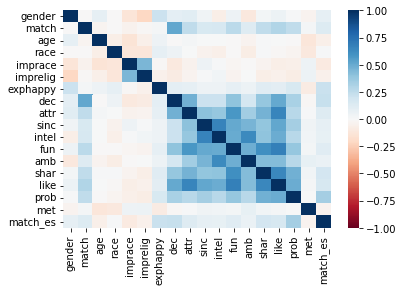

In [21]:
corr = df.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=False, cmap='RdBu')

##Regression Analysis: Logistic Regression
Since our target is a yes/no variable (match)

###Split Data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_norm.drop(columns=['match']), df_norm['match'], test_size=.25)

###Run Model & Test it


####Create Model & Look at Error
note: testing error is lower than training error, but they are fairly close together. There is no evidence to suggest overfitting has occured

In [39]:
model = LogisticRegression()
model.fit(X_train, y_train)


#get Testing and Training error

print("Logistic Regression MSE Trial 1:")
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

#mse for training data
mse = mean_squared_error(y_train, yhat_train)
print('Training MSE: %8.15f' % mse)

#mse for testing data
mse = mean_squared_error(y_test, yhat_test)
print('Testing MSE: %8.15f' % mse)


Logistic Regression MSE Trial 1:
Training MSE: 0.152223750573132
Testing MSE: 0.149931224209078


####Classification Report
We have an 85% accuracy which is fairly good, so we can assume that no or minimal underfitting has occured by our model. So our model lies in the "good" fitting range. It should be noted that the amount of matches(1's) is less than amount of no matches (0's) and that precision and recall is worse for 1 compared to 0. This indicates our model is better at deciding non-matches than it is at deciding matches.

In [40]:
print("Testing Precision & Recall")
test_classif = classification_report(y_test, yhat_test)
print(test_classif)

Testing Precision & Recall
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      1209
         1.0       0.61      0.30      0.40       245

    accuracy                           0.85      1454
   macro avg       0.74      0.63      0.66      1454
weighted avg       0.83      0.85      0.83      1454



###Coefficient Analysis
An indvidual's decision on the night of the event and, how likely do you think it is that your partner likes you, seems to have to most weight in determing match. Ambition seems to have a negative impact on match. Regression will be re-run without decision, for comparision.

In [26]:
print(df_colnames)
print(model.coef_)

['gender', 'match', 'age', 'race', 'imprace', 'imprelig', 'exphappy', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es']
[[-0.32714456 -0.53583008 -0.44988904 -0.05714468  0.11353985 -0.62122433
   5.53505233 -0.46581986  0.32655729  0.76154882  1.04829036 -0.58363767
   0.33639372 -0.29454614  1.74424416  0.3863365  -0.28057938]]


###Logistic Regression Without 'dec'
Without the overwhelming decider feature 'dec' there is some evidence that lower score on personal perception of attractiveness, fun, and a lower score on liking partner or guessing that partner likes you makes it less likely to get a match.

In [41]:
#remove 'dec' from dataset
df_ndec = df_norm.drop(columns=['dec'])
df_ndec_colnames = ['gender', 'match', 'age', 'race', 'imprace', 'imprelig', 'exphappy',
         'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met', 'match_es']

#split the data
X_train, X_test, y_train, y_test = train_test_split(df_ndec.drop(columns=['match']), df_ndec['match'], test_size=.25)

#rerun the model
model = LogisticRegression()
model.fit(X_train, y_train)
test_classif = classification_report(y_test, model.predict(X_test))
#get Testing and Training error
print("Logistic Regression MSE Trial 1:")
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)
#mse for training data
mse = mean_squared_error(y_train, yhat_train)
print('Training MSE: %8.15f' % mse)
#mse for testing data
mse = mean_squared_error(y_test, yhat_test)
print('Testing MSE: %8.15f' % mse)
print('*********************')
print("Testing Precision & Recall")
print(test_classif)

#look at coefficients
print(df_ndec_colnames)
print(model.coef_)

Logistic Regression MSE Trial 1:
Training MSE: 0.160706098120128
Testing MSE: 0.173314993122421
*********************
Testing Precision & Recall
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      1211
         1.0       0.42      0.10      0.16       243

    accuracy                           0.83      1454
   macro avg       0.63      0.54      0.53      1454
weighted avg       0.77      0.83      0.78      1454

['gender', 'match', 'age', 'race', 'imprace', 'imprelig', 'exphappy', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es']
[[-0.13468742 -0.68352051  0.02417636 -0.40869591  0.11773562 -0.6295904
   1.55990038 -0.74847102  0.89605084  1.79002569 -1.17225441  0.61340979
   2.17087559  1.68644818  0.52786794  1.01935859]]


##Conclusion
A person's decision regarding a match was the strongest indicator of match which is not surprising. However, how much you rate how fun you are and how much you guess the partner likes you also contributed significantly to the match value. When not considering 'dec' the importance of the other features can be more readily analyzed. Personal perception of fun and how much you think the partner likes you still contribute significantly to match value. Additionally, how much you like the partner and how you percieve your own attractiveness becomes more important. Interestingly for both models your personal perception of ambition is paried with a negative coefficient which seems to indicate a higher personal perception score reduces the probability of making a match. It should be noted that there is more data for not a match and the not a match occurance (a 0) has a greater precision and recall. This indicates that it is more likely that a low personal preception of attractiveness and fun results in a no-match then a high personal preception of attractiveness and fun results in a yes-match.